#**Capstone 4 - Machine Learning**

## **Gender voice recognition**

Project details : This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).

In [281]:
#data analysis
import numpy as np
import pandas as pd
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

# model used - 2 kinds
# 1. (MLP) Multi level perception
from sklearn.neural_network import MLPClassifier

# 2. Keras(CNN) Central Neutral Network
import tensorflow as tf

## **Step 1 : Load the dataset**

In [282]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [283]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/voice recognition by gender/Kaggle voice/voice.csv')

##**The Dataset**
>
###The following acoustic properties of each voice are measured and included within the CSV:


meanfreq: mean frequency (in kHz)

>


sd: standard deviation of frequency

>


median: median frequency (in kHz)

>


Q25: first quantile (in kHz)

>


Q75: third quantile (in kHz)

>


IQR: interquantile range (in kHz)

>


skew: skewness

>


kurt: kurtosis

>


sp.ent: spectral entropy

>


sfm: spectral flatness

>


mode: mode frequency

>


centroid: frequency centroid (see specprop)

>


peakf: peak frequency (frequency with highest energy)

>


meanfun: average of fundamental frequency measured across acoustic signal

>


minfun: minimum fundamental frequency measured across acoustic signal

>


maxfun: maximum fundamental frequency measured across acoustic signal

>


meandom: average of dominant frequency measured across acoustic signal

>


mindom: minimum of dominant frequency measured across acoustic signal

>


maxdom: maximum of dominant frequency measured across acoustic signal

>


dfrange: range of dominant frequency measured across acoustic signal

>


modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range

>


label: male or female

## **Step 2 : Initial EDA & Data Preparation**

In [284]:
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

<Axes: >

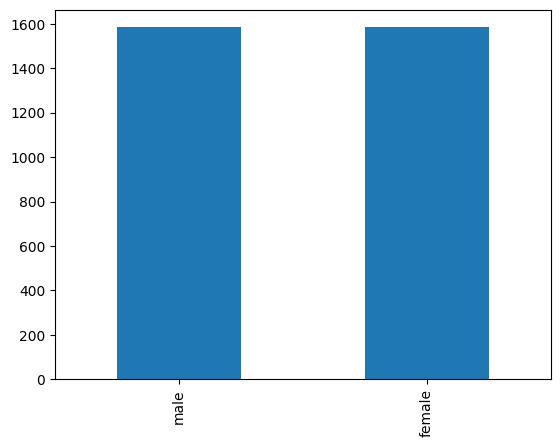

In [286]:
df['label'].value_counts().plot(kind='bar')

##  Editing the dataframe

In [287]:
# Easy way of converting labels
#label_encoder = LabelEncoder()
##df['label'] = label_encoder.fit_transform(df['label'])
#dict(enumerate(label_encoder.classes_))

In [288]:
# The harder way to replace labels
df.replace(to_replace="female", value=0, inplace=True)
df.replace(to_replace="male", value=1, inplace=True)


In [289]:
# Label our X and y
y = df['label'].copy()
X = df.drop('label', axis=1).copy()

In [290]:
# Double checking our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   int6

In [291]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Splitting and Scaling

In [292]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [293]:
X_train.shape
#3618*0.7

(2217, 20)

In [294]:
X_test.shape

(951, 20)

##**Step 3a : Modelling and training; Multilayer perceptron (MLP)**

In [295]:
mlp = MLPClassifier(hidden_layer_sizes=100, max_iter=300,activation='relu',solver='adam',random_state=42)
mlp.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=100, max_iter=300, random_state=42)

In [296]:
pred=mlp.predict(X_test)
pred

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,

In [297]:
mlp_cm=confusion_matrix(y_test,pred)
mlp_cm

array([[442,  10],
       [ 14, 485]])

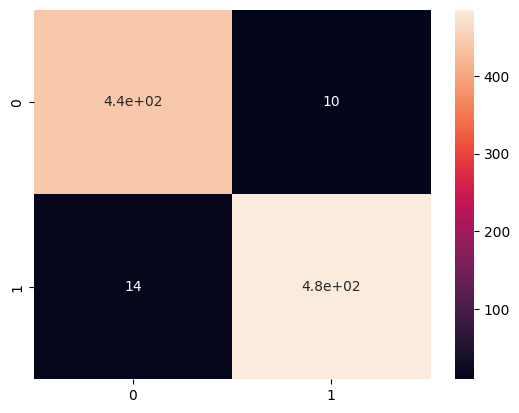

In [298]:
sns.heatmap(mlp_cm,annot=True,cmap='rocket')
plt.show()

In [299]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       452
           1       0.98      0.97      0.98       499

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951



##**Step 3b: Modeling and training ; Central Neutral Network (CNN)**

In [300]:
inputs = tf.keras.Input(shape=(X.shape[1],))

x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

In [301]:
model.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 20)]              0         
                                                                 
 dense_35 (Dense)            (None, 64)                1344      
                                                                 
 dense_36 (Dense)            (None, 64)                4160      
                                                                 
 dense_37 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,569
Trainable params: 5,569
Non-trainable params: 0
_________________________________________________________________


In [302]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
56/56 [==============================] - 1s 7ms/step - loss: 0.4559 - accuracy: 0.7964 - auc: 0.8973 - val_loss: 0.2545 - val_accuracy: 0.9347 - val_auc: 0.9910
Epoch 2/100
56/56 [==============================] - 0s 3ms/step - loss: 0.1844 - accuracy: 0.9504 - auc: 0.9882 - val_loss: 0.1127 - val_accuracy: 0.9707 - val_auc: 0.9945
Epoch 3/100
56/56 [==============================] - 0s 3ms/step - loss: 0.1011 - accuracy: 0.9667 - auc: 0.9947 - val_loss: 0.0728 - val_accuracy: 0.9820 - val_auc: 0.9970
Epoch 4/100
56/56 [==============================] - 0s 3ms/step - loss: 0.0798 - accuracy: 0.9724 - auc: 0.9961 - val_loss: 0.0649 - val_accuracy: 0.9797 - val_auc: 0.9970
Epoch 5/100
56/56 [==============================] - 0s 3ms/step - loss: 0.0693 - accuracy: 0.9797 - auc: 0.9969 - val_loss: 0.0562 - val_accuracy: 0.9797 - val_auc: 0.9976
Epoch 6/100
56/56 [==============================] - 0s 3ms/step - loss: 0.0630 - accuracy: 0.9786 - auc: 0.9973 - val_loss: 0.0594 - v

In [303]:
model.evaluate(X_test, y_test)

30/30 [==============================] - 0s 3ms/step - loss: 0.0657 - accuracy: 0.9758 - auc: 0.9976


[0.06571630388498306, 0.975814938545227, 0.9975992441177368]

30/30 [==============================] - 0s 2ms/step


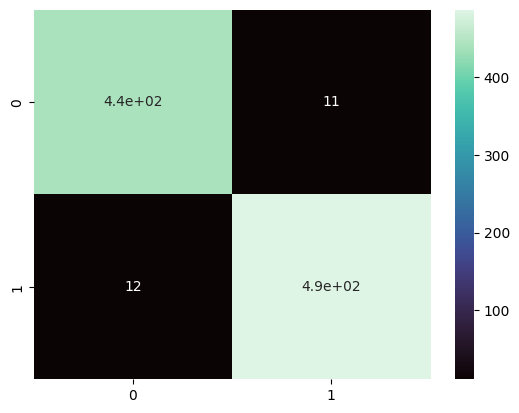

In [304]:
y_pred=np.squeeze(model.predict(X_test))
threshold = 0.5
y_pred = (y_pred >= threshold).astype(int)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='mako')
plt.show()

In [305]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       452
           1       0.98      0.98      0.98       499

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951



##**Step 3c: Modeling and training ; Central Neutral Network (CNN) after converting data into a picture**

In [306]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-4.049248,0.427355,-4.224901,-2.576102,-5.693607,-0.214778,2.293306,1.762946,-0.039083,0.471575,-2.141210,-4.049248,-1.812038,-1.097998,0.565959,-1.564205,-0.708404,-1.431422,-1.419137,-1.454772
1,-3.841053,0.611669,-3.999293,-2.486885,-5.588987,-0.258485,4.548056,4.433008,-0.065236,0.594431,-2.141210,-3.841053,-1.079594,-1.091533,-0.294030,-1.561916,-0.708404,-1.418107,-1.405818,-1.014103
2,-3.463066,1.603848,-4.095851,-2.706986,-3.928699,0.909326,6.513656,7.326207,-1.083730,0.398261,-2.141210,-3.463066,-1.365368,-1.100397,0.410480,-1.563866,-0.708404,-1.429203,-1.416917,-1.065344
3,-0.992157,0.899998,-0.759454,-0.901418,-0.711205,0.632690,-0.449858,-0.240099,1.516383,1.797340,-1.054576,-0.992157,-1.666966,-0.988934,-0.294030,-1.195367,-0.708404,-1.273867,-1.261532,0.614286
4,-1.530640,1.322561,-1.676948,-1.268395,-0.792029,1.005588,-0.480911,-0.238940,1.708336,2.114740,-0.790514,-1.530640,-1.127233,-1.034015,0.260185,-0.221660,-0.708404,0.124154,0.136933,0.289046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,-1.638842,1.658182,-0.877839,-1.873163,-0.999378,1.579141,-0.325020,-0.221916,1.507749,1.999883,0.460602,-1.638842,1.237885,2.444087,0.114817,0.007024,-0.708404,-0.237556,-0.224892,-0.098989
3164,-2.162452,1.927682,-2.994482,-2.008095,-0.840021,1.820721,-0.577009,-0.252503,1.458418,1.697831,-1.963949,-2.162452,1.429532,-0.124536,0.565959,0.153573,-0.214641,-0.388453,-0.384717,0.871981
3165,-1.298773,2.322724,-0.051973,-2.199039,-0.017123,2.492666,-0.298044,-0.222108,1.150198,1.385857,-2.037497,-1.298773,2.077781,0.140728,0.565959,-0.637833,-0.708404,-0.599266,-0.586717,0.175887
3166,-1.245202,2.012196,-0.017728,-1.991852,-0.204021,2.153653,-0.365367,-0.231123,1.229850,1.505711,0.607848,-1.245202,0.915445,-0.120678,-0.294030,-0.072080,-0.708404,-0.412863,-0.400255,1.149161


In [307]:
pd.DataFrame(tf.keras.preprocessing.sequence.pad_sequences(X, dtype=np.float64, maxlen=25, padding='post'))

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-4.049248,0.427355,-4.224901,-2.576102,-5.693607,-0.214778,2.293306,1.762946,-0.039083,0.471575,...,-1.564205,-0.708404,-1.431422,-1.419137,-1.454772,0.0,0.0,0.0,0.0,0.0
1,-3.841053,0.611669,-3.999293,-2.486885,-5.588987,-0.258485,4.548056,4.433008,-0.065236,0.594431,...,-1.561916,-0.708404,-1.418107,-1.405818,-1.014103,0.0,0.0,0.0,0.0,0.0
2,-3.463066,1.603848,-4.095851,-2.706986,-3.928699,0.909326,6.513656,7.326207,-1.083730,0.398261,...,-1.563866,-0.708404,-1.429203,-1.416917,-1.065344,0.0,0.0,0.0,0.0,0.0
3,-0.992157,0.899998,-0.759454,-0.901418,-0.711205,0.632690,-0.449858,-0.240099,1.516383,1.797340,...,-1.195367,-0.708404,-1.273867,-1.261532,0.614286,0.0,0.0,0.0,0.0,0.0
4,-1.530640,1.322561,-1.676948,-1.268395,-0.792029,1.005588,-0.480911,-0.238940,1.708336,2.114740,...,-0.221660,-0.708404,0.124154,0.136933,0.289046,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,-1.638842,1.658182,-0.877839,-1.873163,-0.999378,1.579141,-0.325020,-0.221916,1.507749,1.999883,...,0.007024,-0.708404,-0.237556,-0.224892,-0.098989,0.0,0.0,0.0,0.0,0.0
3164,-2.162452,1.927682,-2.994482,-2.008095,-0.840021,1.820721,-0.577009,-0.252503,1.458418,1.697831,...,0.153573,-0.214641,-0.388453,-0.384717,0.871981,0.0,0.0,0.0,0.0,0.0
3165,-1.298773,2.322724,-0.051973,-2.199039,-0.017123,2.492666,-0.298044,-0.222108,1.150198,1.385857,...,-0.637833,-0.708404,-0.599266,-0.586717,0.175887,0.0,0.0,0.0,0.0,0.0
3166,-1.245202,2.012196,-0.017728,-1.991852,-0.204021,2.153653,-0.365367,-0.231123,1.229850,1.505711,...,-0.072080,-0.708404,-0.412863,-0.400255,1.149161,0.0,0.0,0.0,0.0,0.0


In [308]:
#include additional columns to make it 25 columns (5X5)
X = tf.keras.preprocessing.sequence.pad_sequences(X, dtype=np.float64, maxlen=25, padding='post')

X = X.reshape(-1, 5, 5)
X = np.expand_dims(X, axis=3)


In [309]:
X.shape


(3168, 5, 5, 1)

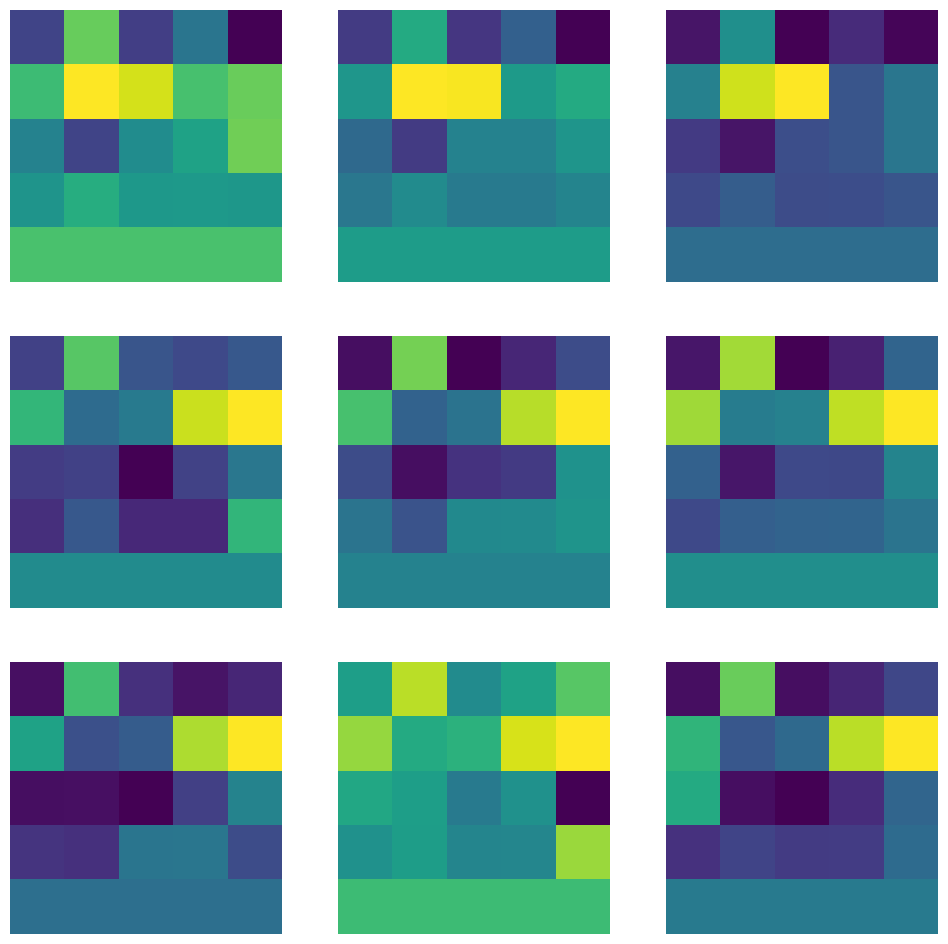

In [310]:
plt.figure(figsize=(12, 12))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(np.squeeze(X[i]))
    plt.axis('off')

plt.show()

In [311]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [312]:
inputs = tf.keras.Input(shape=(X.shape[1], X.shape[2], X.shape[3]))

x = tf.keras.layers.Conv2D(16, 2, activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D()(x)

x = tf.keras.layers.Conv2D(32, 1, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D()(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(64, activation='relu')(x)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

In [313]:
model.summary()


Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 5, 5, 1)]         0         
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 16)          80        
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 2, 2, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 2, 2, 32)          544       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 1, 1, 32)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 32)                0  

In [314]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
56/56 [==============================] - 2s 11ms/step - loss: 0.6517 - accuracy: 0.5967 - auc: 0.7373 - val_loss: 0.6049 - val_accuracy: 0.6734 - val_auc: 0.8191
Epoch 2/100
56/56 [==============================] - 0s 6ms/step - loss: 0.5167 - accuracy: 0.7840 - auc: 0.8877 - val_loss: 0.4594 - val_accuracy: 0.8131 - val_auc: 0.9047
Epoch 3/100
56/56 [==============================] - 0s 5ms/step - loss: 0.3575 - accuracy: 0.8821 - auc: 0.9471 - val_loss: 0.3141 - val_accuracy: 0.8941 - val_auc: 0.9500
Epoch 4/100
56/56 [==============================] - 0s 5ms/step - loss: 0.2689 - accuracy: 0.8951 - auc: 0.9646 - val_loss: 0.2653 - val_accuracy: 0.9054 - val_auc: 0.9583
Epoch 5/100
56/56 [==============================] - 0s 5ms/step - loss: 0.2276 - accuracy: 0.9120 - auc: 0.9719 - val_loss: 0.2755 - val_accuracy: 0.8941 - val_auc: 0.9648
Epoch 6/100
56/56 [==============================] - 0s 4ms/step - loss: 0.2062 - accuracy: 0.9199 - auc: 0.9756 - val_loss: 0.2340 - 

In [315]:
model.evaluate(X_test, y_test)

30/30 [==============================] - 0s 2ms/step - loss: 0.1394 - accuracy: 0.9495 - auc: 0.9878


[0.13937224447727203, 0.9495267868041992, 0.9878451228141785]

In [316]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       452
           1       0.98      0.98      0.98       499

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951



30/30 [==============================] - 0s 1ms/step


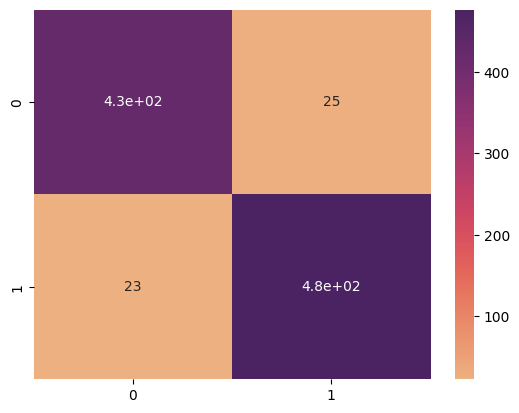

In [317]:
y_pred=np.squeeze(model.predict(X_test))
threshold = 0.5
y_pred = (y_pred >= threshold).astype(int)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='flare')
plt.show()